# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

#### Original Exploration

[2_15_Matplotlib_Scatter_Plots.ipynb](https://github.com/furtadorebeca/2_RF_Advanced/blob/main/2_15_Matplotlib_Scatter_Plots.ipynb)  
[2_16_Matplotlib_Advanced_Customization.ipynb](https://github.com/furtadorebeca/2_RF_Advanced/blob/main/2_16_Matplotlib_Advanced_Customization.ipynb)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# First, let's filter our Data Frame for Data Analyst jobs in the United States
# Reminder to self: if you inspect the Data Frame and only the titles of the columns come back: check if you mispelled the name of one of the columns ;)
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Because we only want to look at the rows that actually have a salary_year_avg, let's drop the NA ones
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Our job_skills is a list, we need to get it exploded into a single skill per row
df_DA_US_exploded = df_DA_US.explode('job_skills')

# Now let's take a peek on two columns: salary_year_avg and job_skills
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [3]:
# Now let's perform a grouping on this Data Frame so we can group the job_skills based on the MEDIAN Salary and COUNT
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [4]:
# This is a good start, but we want the higher COUNTS at the top, so let's sort by this column
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [5]:
# Let's assign this Data Frame to df_DA_skills
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Because we're going to have multiple columns in this Data Frame, let's be very clear about what information these columns hold.
# Having said that, let's RENAME these columns as: count -> skill_count; median -> median_salary
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [6]:
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [7]:
# We need one more thing in our Data Frame, we need that percentage, so what we can do is use our original Data Frame of df_DA_US (the one we removed the NA salary from it)
# We can get the length of this Data Frame and this will provide us with the number of job postings.
# For this, let's create a new variable called DA_job_count, which has a int numbger of the number of rows in the df_DA_US Data Frame
DA_job_count = len(df_DA_US)

In [8]:
# Now we need to create that new column of the skill_percent. We will use this formula skill_count / job_count * 100
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [9]:
# This Data Frame has 170 rows. 
# We're not going to plot all of them in the scatter plot, instead we want to calculate which percentage, or cut-off percentage of what values we do want to include on there.
# Let's create a skill percent variable with 5 | Why 5? We can play with different numbers and see the benefit of showing many skills without clogging much the visualization
skill_percent = 5

# With the skill_percent variable, we're going to create a new Data Frame to filter our df_DA_skills Data Frame to make sure we have values greater than 5%
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Plotting

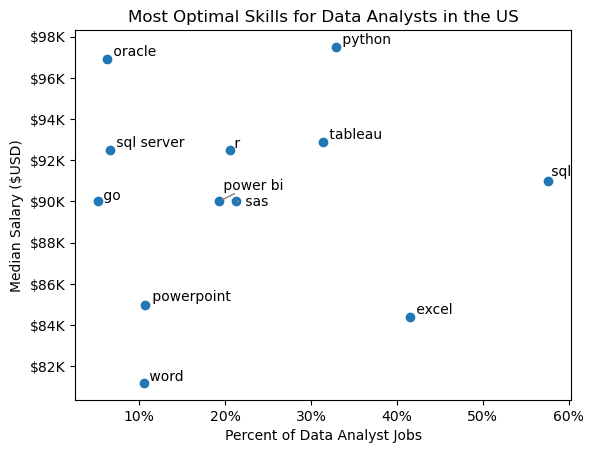

In [10]:
# Checking our previous visualization
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca() #gca -> Get Current Axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
# Import the Percent Formatter from matplotlib.ticket
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

We want, as job seekers, to have skills from the **top-right quadrant** of the chart above because not only these are **high-demand skills**, but they are also **high-paying skills**.
- In this chart, these skills are: **Python**, **Tableau** and **SQL**.
- There are also some skills in the outside boundaries: **Oracle** (high paying, but not often requested), **R**, **SAS**, **Power BI** and **Excel**(Excel is often requested, but it doesn't translate to a high paying skill).

In [11]:
# We want to take this visualization a step further and colour it by the type of core technology, e.g., database, programming, cloud, etc.
# In our Dataset, we have a column called job_type_skills that shows the type of core technology. It's a dictionary.
# Let's inspect it the first 10 values:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [12]:
# Cleaning up this Dataset. With this code, we aggregate all the skills under one key (analyst_tools) in a singular dictionary.
# So 'analyst_tools' now has ALL the analyst tools that appear within a list.
# Conversely, 'databases' now has ALL the databases that appear within a list.
# ...and libraries, programming, and so on...

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'msaccess',
  'microstrategy',
  'sap',
  'looker',
  'spss',
  'sharepoint',
  'word',
  'esquisse',
  'ssis',
  'splunk',
  'visio',
  'nuix',
  'datarobot',
  'outlook',
  'sas',
  'ms access',
  'power bi',
  'qlik',
  'sheets',
  'tableau',
  'powerbi',
  'dax',
  'excel',
  'cognos',
  'ssrs',
  'powerpoint',
  'spreadsheet'],
 'programming': ['erlang',
  'ocaml',
  'typescript',
  'groovy',
  'go',
  'python',
  'nosql',
  'kotlin',
  'no-sql',
  'apl',
  'c',
  'haskell',
  'vba',
  'sas',
  'f#',
  'pascal',
  't-sql',
  'java',
  'lua',
  'javascript',
  'css',
  'c#',
  'shell',
  'clojure',
  'julia',
  'assembly',
  'php',
  'crystal',
  'lisp',
  'mongodb',
  'golang',
  'vb.net',
  'mongo',
  'visualbasic',
  'html',
  'bash',
  'fortran',
  'sass',
  'elixir',
  'objective-c',
  'scala',
  'r',
  'powershell',
  'dart',
  'sql',
  'visual basic',
  'ruby',
  'swift',
  'matlab',
  'delphi',
  'rust',
  'cobol',
  'perl',
  'c++',
  'solid

In [13]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

# We need to break out the skills column, so we're going to explode it! :)
df_technology = df_technology.explode('skills')

In [14]:
df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,msaccess
0,analyst_tools,microstrategy
0,analyst_tools,sap
0,analyst_tools,looker
...,...,...
9,sync,microsoft teams
9,sync,twilio
9,sync,rocketchat
9,sync,webex


In [15]:
# With this singular Data Frame of technology with their associated skill, now we can morge it back to our df_DA_skills_demand Data Frame, shown below:
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [16]:
# Merging the df_DA_skills_high_demand with the df_technology Data Frame
# Refresher: in the merge command, we give the name of the Data Frames we're merging, along with the name of their fields which need to match
df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [17]:
# Let's store the Data Frame above on the df_plot variable
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on='skills')

4 [0.35296618 0.06749495]
5 [-0.93139974 -0.77772793]


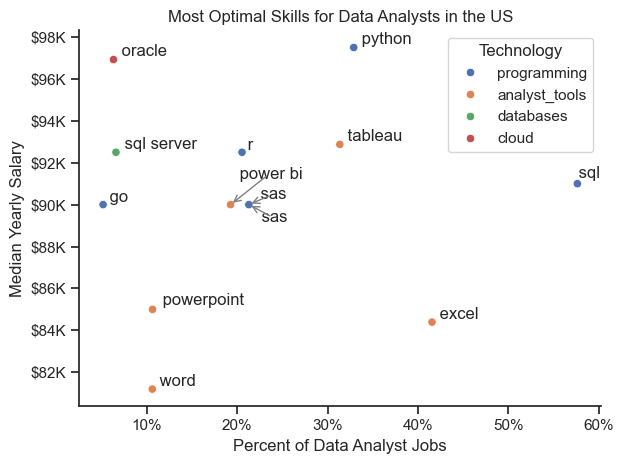

In [19]:
# So, now, we have the Data Frame that we need to plot! (we're re-using the previous code and improving on it)

from adjustText import adjust_text # we're importing the adjust_text to prevent overlap on the words 

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine() #removing the border around the chart
sns.set_theme(style='ticks')

# Prepare texts for adjustText, using df_plot for both coordinates and labels
texts = []
for i, row in df_plot.iterrows():
    texts.append(
        plt.text(row['skill_percent'], row['median_salary'], " " + str(row['skills']))
    )

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray'),
    expand_text=(1.2, 1.4),
    expand_points=(1.2, 1.4),
    force_text=0.5,
    force_points=0.5,
    verbose=False #removes some unecessary debug output
)

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()